# 一、读取训练集

In [1]:
path = '../搜狗新闻整理/总整理/data/train.txt'
file_list = open(path, 'rb').readlines()

In [2]:
len(file_list)

35000

In [3]:
import pandas as pd
#创建一个空的Dataframe
result =pd.DataFrame(columns=('content','tag'))

In [4]:
import re
qq = file_list[0].decode('utf8').split('\t')[0].strip().replace(" ",'')
re.sub('([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u007a])', '', qq)

'北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组2日发表的报告说他们对今年春天观测到的北极上空臭氧减少的数据进行了分析最终确认这次北极臭氧减少幅度打破了观测记录首次出现了类似南极上空的臭氧空洞美国加拿大芬兰丹麦等国研究人员共同完成的这份报告发表在自然杂志网站上报告说对今年春天北极上空臭氧观测数据的分析显示在18到20公里的高空臭氧减少的幅度超过了80可谓史无前例其程度可与南极臭氧空洞相提并论可以认为北极首次出现了臭氧空洞研究人员分析北极臭氧此次大幅减少的原因是从去年冬天到今年春天北极地区寒冷天气持续时间异乎寻常的长在寒冷条件下能破坏臭氧的含氯化合物会更活跃导致了臭氧空洞的出现臭氧是由三个氧原子组成的氧同素异形体距地表20公里左右高空存在一个臭氧层可以吸收部分对人体有害的紫外线暴露在这些紫外线下可导致人们皮肤烧伤甚至患上皮肤癌近几十年来由于人类释放了大量氯氟烃等破坏臭氧的物质臭氧层不时出现一些空洞特别是在南极地区每年冬天都会观测到臭氧空洞'

In [5]:
import re
for item in file_list:
    line = item.decode('utf8').split('\t')
    # 去除非汉字、非数字、非字母的其他符号
    content = line[0].strip().replace(" ",'')
    content = re.sub('([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u007a])', '', content)
    tag = line[1].strip()
    result=result.append(pd.DataFrame({'content':[content],'tag':[tag]}),ignore_index=True)

In [6]:
result

,content,tag
0,北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组2日发表的报告说他们对今年...,3
1,中国经济网北京月日综合报道记者袁志丽二十国集团领导人第七次峰会日在墨西哥洛斯卡沃斯开幕一些主...,0
2,新华网天津月日电记者周润健蔡玉高在欣赏完了美丽的月偏食和震撼的金星凌日之后月天宇的第三场特殊...,9
3,本报讯记者陈小平从月日至日为第三次志愿填报时间我省考生可填报本科三批专项计划专科批高职高专一...,2
4,前排空间和后排空间车身和轴距均不算小但是内部空间并不能让人满意身材比较高大的人坐进去就会感觉...,5
...,...,...
34995,乐高印第安纳琼斯2冒险继续公布当年乐高与蝙蝠侠结合产生了乐高蝙蝠侠接着又与LucasArts...,7
34996,韩国媒体声称解放军正在中朝界河鸭绿江上进行渡江演练并公布图片和影像资料韩国媒体对此大加猜测认...,4
34997,月广州市汽车销售数据表明市场资源开始向强势品牌集中图文本报记者向寒松本报记者独家获得的有关数...,5
34998,研究称尼罗河美女半身像或经美化图古埃及王后奈费尔提蒂Nefertiti素有尼罗河美女之称新浪...,3


# 二、去除重复

In [7]:
# 显示和其他重复了的内容
news = result
print(news.duplicated().sum())
display(news[news.duplicated()])

1481


,content,tag
251,您所要访问的房源信息不存在或已被删除个人登录企业登录,1
415,企业专区自动抓取最新新闻览尽企业所有产品查阅网友评论尽在企业专区,5
602,资料图泰国总理拜见泰国公主的礼节实在太销魂了人民日报刊登了泰王国总理英拉西那瓦阁下致中华人民...,4
637,您所要访问的房源信息不存在或已被删除个人登录企业登录,1
797,本网站提供之资料或信息仅供投资者参考不构成投资建议搜狐财经频道联系方式热线电话或,0
...,...,...
34969,年我们为孙见坤不平为唐骏不齿搜狐教育频道诚邀各方嘉宾盘点一年新闻人物我们期盼国家中长期教育改...,2
34975,搜狐汽车月日讯据路透社报道德国大众汽车上周五证实由于怀疑其在华合作伙伴一汽集团盗用了自己在动...,5
34979,每个国家有它自己的国民性格和历史积累不能说俄罗斯的乱就一定比美国的差近代以来俄罗斯一直是开疆...,4
34992,前摘中国若使用其日益现代化和强大的武装部队可轻而易举控制南海有争议地区与中国相比菲律宾军队微...,4


In [8]:
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


In [9]:
#正则匹配去除数字、符号、空格
import re
from string import digits
#正则化
re_obj = re.compile(
    r"[!\"#$%&'()*+,-./:;<=>?@[\\\]^_`{|}~—！，。？、￥…（）：【】《》‘’“”\s]+")
re_obj2=re.compile(
    r'[a-zA-Z0-9’!"#$%&\'()*+,-.<=>?@，。?★、…【】《》？“”‘’！[\\]^_`{|}~\s]+')

def clear(text):
    res=re_obj.sub('', text)
    res =re.sub('[^\u4e00-\u9fa5]+','',text)
    return res



news['content'] = news['content'].apply(clear)
news.sample(5)

,content,tag
7552,晨报讯记者孙金凤奇瑞路虎的合资项目正在一步步推进之中从日前国家环保部发布的信息显示奇瑞捷豹路...,5
3795,玩开心泡泡吧让你开心泡回家火热的夏天只适合火热的心情而开心泡泡吧就像一道清凉的风为节日带来了...,7
18538,中新网月日电据美国星岛日报日报道美国罗得岛州东普罗维顿斯市有父子两人福星高照两天内先后中奖首...,6
31304,新华网塔吉克斯坦胡占德电和平使命联合军演日在塔吉克斯坦胡占德市落下帷幕前来观摩军演的上海合作...,4
14948,扬子晚报讯今年高校在预估分数线时基本都给出了考分对应的排名而不少学校给出的排名又相差不大这让...,2


In [10]:
# 统计最长字符数   一条新闻最长会有26038
print("max length: "+str(news['content'].map(lambda x: len(x)).max()))
print("min length: "+str(news['content'].map(lambda x: len(x)).min()))


max length: 26038
min length: 0


In [11]:
# 发现有一些行为空
for i,row in news.iterrows():
    if len(row['content']) == 0:
        print(row)

content     
tag        3
Name: 7070, dtype: object
content     
tag        9
Name: 32207, dtype: object
content     
tag        5
Name: 34874, dtype: object


In [12]:
# 去除字符长度小于20的标本
news = news[~(news.content.str.len()<20)]
display(news)

,content,tag
0,北极上空惊现臭氧空洞臭氧减少幅度打破记录据新华社电一个国际研究小组日发表的报告说他们对今年春...,3
1,中国经济网北京月日综合报道记者袁志丽二十国集团领导人第七次峰会日在墨西哥洛斯卡沃斯开幕一些主...,0
2,新华网天津月日电记者周润健蔡玉高在欣赏完了美丽的月偏食和震撼的金星凌日之后月天宇的第三场特殊...,9
3,本报讯记者陈小平从月日至日为第三次志愿填报时间我省考生可填报本科三批专项计划专科批高职高专一...,2
4,前排空间和后排空间车身和轴距均不算小但是内部空间并不能让人满意身材比较高大的人坐进去就会感觉...,5
...,...,...
34994,苹果公司即将获得在中国注册的商标代价是万美元的真金白银月日深圳市中级人民法院向国家工商总局商...,9
34995,乐高印第安纳琼斯冒险继续公布当年乐高与蝙蝠侠结合产生了乐高蝙蝠侠接着又与合作推出了乐高星球大...,7
34997,月广州市汽车销售数据表明市场资源开始向强势品牌集中图文本报记者向寒松本报记者独家获得的有关数...,5
34998,研究称尼罗河美女半身像或经美化图古埃及王后奈费尔提蒂素有尼罗河美女之称新浪科技讯北京时间月日...,3


In [13]:
#jieba分词
import jieba
def cut_word(text):
    return jieba.cut(text)
news['content'] = news['content'].apply(cut_word)
news.sample(5)

C:\Users\huang\AppData\Local\Temp/ipykernel_19992/346849601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(cut_word)


,content,tag
10443,<generator object Tokenizer.cut at 0x0000020A5...,7
7863,<generator object Tokenizer.cut at 0x0000020A5...,7
1126,<generator object Tokenizer.cut at 0x0000020A5...,0
10344,<generator object Tokenizer.cut at 0x0000020A5...,5
10866,<generator object Tokenizer.cut at 0x0000020A5...,10


In [14]:
#去除停用词
def get_stopword():
    s = set()
    with open('../all_stopwords.txt','r',encoding='UTF-8') as f:
        for line in f:
            s.add(line.strip())
    return s

def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword = get_stopword()
news['content'] = news['content'].apply(remove_stopword)
news.sample(5)
news.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\huang\AppData\Local\Temp\jieba.cache
Loading model cost 1.785 seconds.
Prefix dict has been built successfully.
C:\Users\huang\AppData\Local\Temp/ipykernel_19992/914136541.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(remove_stopword)


,content,tag
0,"[北极, 上空, 惊现, 臭氧, 空洞, 臭氧, 减少, 幅度, 打破记录, 新华社, 电,...",3
1,"[中国, 经济网, 北京, 综合, 报道, 记者, 袁志丽二, 十国集团, 领导人, 第七次...",0
2,"[新华网, 天津, 日电, 记者, 周润, 健, 蔡玉高, 欣赏, 完, 美丽, 月偏食, ...",9
3,"[本报讯, 记者, 陈小平, 第三次, 志愿, 填报, 时间, 我省, 考生, 填报, 本科...",2
4,"[前排, 空间, 后排, 空间, 车身, 轴距, 均, 不算, 内部空间, 满意, 身材, ...",5


3     4267
10    3112
7     3108
0     3097
8     3096
1     3040
9     2945
2     2924
5     2916
6     2913
4     1948
Name: tag, dtype: int64


<AxesSubplot:>

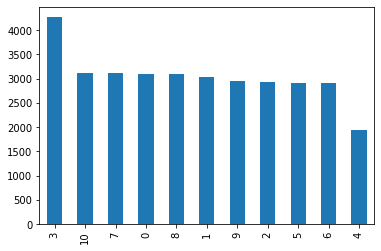

In [15]:
#查看每个标签拥有条数
t= news['tag'].value_counts()
print(t)
t.plot(kind='bar')

# 三、构建词云图

In [19]:
from itertools import chain
from collections import Counter

li_2d = news['content'].tolist()
li_1d = list(chain.from_iterable(li_2d))

# 二维列表转换为一维列表

print(f'总词汇量:{len(li_1d)}')
c= Counter(li_1d)
print(f'不重复词汇量:{len(c)}')
common = c.most_common(15)
print(common)

总词汇量:6887253
不重复词汇量:256277
[('中国', 31298), ('游戏', 19942), ('市场', 19246), ('公司', 18966), ('更', 18321), ('时间', 16515), ('发展', 15954), ('时', 15319), ('记者', 14688), ('新', 14645), ('北京', 14515), ('美国', 14158), ('企业', 12639), ('工作', 11714), ('玩家', 10855)]


In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf',width=800,height=600)
# 可以自定义背景图：WordCloud(mask=plt.imread('文件路径'))
# li_2d = news['content'].tolist()
# li_1d = list(chain.from_iterable(li_2d))
# join_words = ''.join(li_1d)
# img = wc.generate(join_words)
# generate()该方法生成的词云图非严格按照词汇出现频率，不精确
# 传进去的参数需要前面加空格处理
# plt.figure(figsize=(15,10))
# plt.imshow(img)
# plt.axis('off')
# 关闭坐标轴
# wc.to_file('wordcloud.png'）

(-0.5, 799.5, 599.5, -0.5)

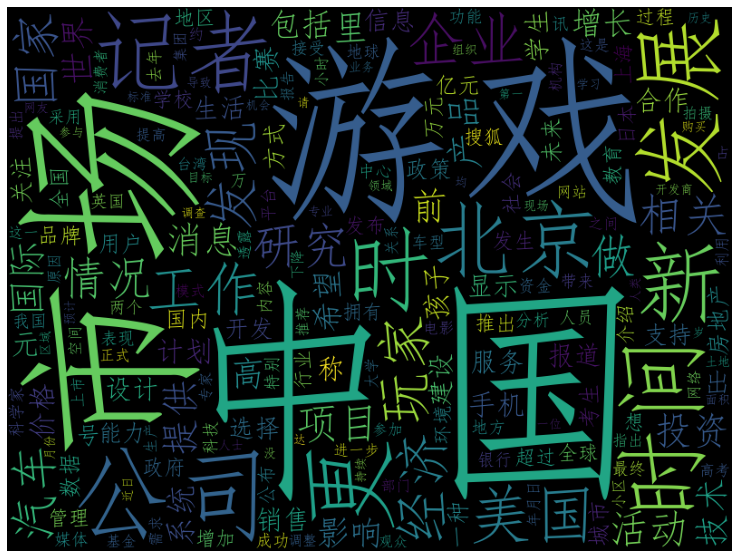

In [21]:
plt.figure(figsize=(15,10))
img = wc.generate_from_frequencies(c)
# generate_from_frequencies()该方法生成的词云图严格按照词汇出现频率
# 词汇出现频率越高，文字占比越大
# 传进去的参数为频数，前面不需要加空格处理
plt.imshow(img)
plt.axis('off')

# 四、构建训练与测试集

In [16]:
# 构建训练与测试集
def join(text_list):
    return " ".join(text_list)

news['content'] = news['content'].apply(join)
news.sample(5)

C:\Users\huang\AppData\Local\Temp/ipykernel_19992/934685048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['content'] = news['content'].apply(join)


,content,tag
3136,台当局 悬赏 千万 新台币 查台军 工程 弊案 中国台湾 网月 消息 台湾 中央社 报道 台...,10
14651,银行 存贷 半年 考 大限 降 货币 市场 资金紧张 格局 渐现 端午节 前 交易日 上海银...,0
11465,老 倔头 发表 红太阳 陨落 文革 笑话 独裁者 末日 几个 用户名 疯狂 反毛非 毛为 己...,4
22448,幽灵 副 名称 铁血 战士 官方 正式 公布 育碧 开发 著名 幽灵 第四代 秘密 早 四月...,7
10201,本报讯 记者 刘新宇 记者 昨日 广东 银监局 广东 银监局 出台 进一步 改进 辖 银行 ...,0


In [17]:
from sklearn.model_selection import train_test_split

X = news['content']
y = news['tag']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)  # 3:1
print('训练集样本数：',y_train.shape[0],'测试集样本数：',y_test.shape[0])

训练集样本数： 25024 测试集样本数： 8342


# 五、TF-IDF构造词向量

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer（）对X向量化操作
vec = TfidfVectorizer(ngram_range=(1,2),analyzer='word',token_pattern=u"(?u)\\b\\w+\\b")
# ngram_range=(1,2)对切分的一维/二维元组再进行向量化，减少语句本来不同
# ——但切分出的单词相同带来的误差 
# 用训练集来构建词向量  然后让它fit测试集！
X_train_tran = vec.fit_transform(X_train)
X_test_tran = vec.transform(X_test)
display(X_train_tran,X_test_tran)
#注意：tf–idf不会减小向量维度，也不会减少向量中0的个数，只是将词的重要性(之前是出现次数表示特征重要性大小)以一种更合理的方式重新计算了

<25024x3369752 sparse matrix of type '<class 'numpy.float64'>'
	with 7847849 stored elements in Compressed Sparse Row format>

<8342x3369752 sparse matrix of type '<class 'numpy.float64'>'
	with 1717300 stored elements in Compressed Sparse Row format>

In [19]:
# 词袋模型向量化后会产生过多特征，用方差分析进行特征选择，选出与目标相对
# 变量最相关的20000个特征
from sklearn.feature_selection import f_classif

f_classif(X_train_tran,y_train)

(array([0.97398129, 0.97398129, 0.89648051, ..., 0.68981347, 0.68981347,
        0.68981347]),
 array([0.46363983, 0.46363983, 0.53546337, ..., 0.73501117, 0.73501117,
        0.73501117]))

In [20]:
from sklearn.feature_selection import SelectKBest
import numpy as np

X_train_tran = X_train_tran.astype(np.float32)
X_test_tran = X_test_tran.astype(np.float32)
selector = SelectKBest(f_classif,k=min(20000,X_train_tran.shape[1]))
selector.fit(X_train_tran,y_train)
character  = selector.get_support(indices = True)
#print(character)
X_train_tran = selector.transform(X_train_tran)
X_test_tran = selector.transform(X_test_tran)
print(X_train_tran.shape,X_test_tran.shape)

(25024, 20000) (8342, 20000)


# 使用词袋构建词向量

In [21]:
## 词袋构建向量

from sklearn.feature_extraction.text import CountVectorizer  
vectorizer=CountVectorizer()
print("词频统计：")
X_train_bag = vectorizer.fit_transform(X_train)
X_test_bag = vectorizer.transform(X_test)
print(X_train_bag) # (文本序号，词序号)  出现次数


词频统计：
  (0, 16385)	6
  (0, 196413)	1
  (0, 34962)	3
  (0, 105681)	1
  (0, 179747)	9
  (0, 35236)	3
  (0, 177297)	12
  (0, 116844)	1
  (0, 180881)	2
  (0, 213327)	1
  (0, 112557)	1
  (0, 174267)	1
  (0, 182246)	1
  (0, 183327)	1
  (0, 89160)	2
  (0, 35234)	8
  (0, 47851)	4
  (0, 163386)	3
  (0, 103261)	3
  (0, 196452)	1
  (0, 134088)	1
  (0, 110292)	1
  (0, 161857)	1
  (0, 84929)	4
  (0, 154757)	1
  :	:
  (25023, 1208)	1
  (25023, 138864)	1
  (25023, 145837)	2
  (25023, 20324)	1
  (25023, 91300)	1
  (25023, 159664)	1
  (25023, 103746)	1
  (25023, 164187)	1
  (25023, 145844)	1
  (25023, 589)	1
  (25023, 147)	1
  (25023, 105707)	1
  (25023, 199959)	1
  (25023, 47996)	1
  (25023, 200171)	1
  (25023, 20518)	1
  (25023, 121834)	1
  (25023, 193907)	1
  (25023, 147709)	1
  (25023, 159458)	1
  (25023, 110305)	1
  (25023, 6449)	1
  (25023, 138865)	2
  (25023, 110097)	1
  (25023, 193928)	1


In [22]:
X_train_bag.shape,X_test_bag.shape  #用训练集构建的词向量转换器fit测试集！

((25024, 215705), (8342, 215705))

In [23]:
# 也用方差分析！
from sklearn.feature_selection import SelectKBest
import numpy as np

X_train_bag = X_train_bag.astype(np.float32)
X_test_bag = X_test_bag.astype(np.float32)
selector = SelectKBest(f_classif,k=min(20000,X_train_bag.shape[1]))
selector.fit(X_train_bag,y_train)
character  = selector.get_support(indices = True)
#print(character)
X_train_bag = selector.transform(X_train_bag)
X_test_bag = selector.transform(X_test_bag)
print(X_train_bag.shape,X_test_bag.shape)

(25024, 20000) (8342, 20000)


# 六、开始机器学习

In [89]:
# 逻辑回归
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param = [{'penalty':['l1','l2'], 'C':[0.1,1,10],
        'solver':['liblinear']},
         {'penalty':['elasticnet'],'C':[0.1,1,10],
        'solver':['saga'],'l1_ratio':[0.5]}
        ]


#print(classification_report(y_test,y_hat))

In [90]:
from sklearn import linear_model
# 决策树预测tf-idf
model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
model_softmax_regression.fit(X_train_tran, y_train)
y_predict = model_softmax_regression.predict(X_test_tran)
accurcy = np.sum(y_predict == y_test) / len(y_test)
print(accurcy)

0.8191081275473507


D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\linear_model\logistic.py:946: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "


In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.64      0.73      0.68       754
           1       0.96      0.76      0.85       755
          10       0.77      0.85      0.81       816
           2       0.86      0.83      0.85       739
           3       0.92      0.65      0.77      1024
           4       0.61      0.83      0.70       462
           5       0.93      0.89      0.91       712
           6       0.93      0.97      0.95       725
           7       0.96      0.94      0.95       785
           8       0.79      0.93      0.85       802
           9       0.70      0.69      0.70       768

    accuracy                           0.82      8342
   macro avg       0.82      0.82      0.82      8342
weighted avg       0.83      0.82      0.82      8342



In [113]:
# 决策树预测词袋
model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=10)
model_softmax_regression.fit(X_train_bag, y_train)
y_predict = model_softmax_regression.predict(X_test_bag)
accurcy = np.sum(y_predict == y_test) / len(y_test)
print(accurcy)

0.873651402541357


D:\Anaconda3\envs\LoveZiqi\lib\site-packages\sklearn\linear_model\logistic.py:946: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "


In [114]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       754
           1       0.93      0.92      0.92       755
          10       0.86      0.90      0.88       816
           2       0.89      0.86      0.87       739
           3       0.87      0.85      0.86      1024
           4       0.88      0.84      0.86       462
           5       0.93      0.92      0.93       712
           6       0.94      0.97      0.95       725
           7       0.98      0.96      0.97       785
           8       0.92      0.94      0.93       802
           9       0.69      0.73      0.71       768

    accuracy                           0.87      8342
   macro avg       0.87      0.87      0.87      8342
weighted avg       0.87      0.87      0.87      8342



In [120]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

param = {'n_neighbors':[5,7],
        'weights':['uniform','distance'],
        'p':[2]
        }
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,
                 cv=2,  verbose=10)
gs.fit(X_train_tran,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] n_neighbors=5, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.502, total=   7.0s
[CV] n_neighbors=5, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s remaining:    0.0s


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.444, total=   6.9s
[CV] n_neighbors=5, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.7s remaining:    0.0s


[CV]  n_neighbors=5, p=2, weights=distance, score=0.531, total=   6.6s
[CV] n_neighbors=5, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.4s remaining:    0.0s


[CV]  n_neighbors=5, p=2, weights=distance, score=0.461, total=   6.6s
[CV] n_neighbors=7, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.0s remaining:    0.0s


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.493, total=   6.8s
[CV] n_neighbors=7, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.8s remaining:    0.0s


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.449, total=   6.9s
[CV] n_neighbors=7, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   40.7s remaining:    0.0s


[CV]  n_neighbors=7, p=2, weights=distance, score=0.538, total=   6.7s
[CV] n_neighbors=7, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   47.4s remaining:    0.0s


[CV]  n_neighbors=7, p=2, weights=distance, score=0.471, total=   6.8s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   54.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   54.2s finished


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [122]:
print(gs.best_params_)

{'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [123]:

y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.70      0.49      0.57       754
           1       0.82      0.82      0.82       755
          10       0.91      0.63      0.75       816
           2       0.77      0.77      0.77       739
           3       0.80      0.71      0.75      1024
           4       0.22      0.83      0.34       462
           5       0.88      0.66      0.76       712
           6       0.95      0.78      0.85       725
           7       0.97      0.73      0.83       785
           8       0.83      0.63      0.72       802
           9       0.61      0.59      0.60       768

    accuracy                           0.69      8342
   macro avg       0.77      0.69      0.71      8342
weighted avg       0.79      0.69      0.72      8342



In [124]:
# KNN测词袋
gs = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param,
                 cv=2,  verbose=10)
gs.fit(X_train_bag,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] n_neighbors=5, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.628, total=   6.8s
[CV] n_neighbors=5, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV] . n_neighbors=5, p=2, weights=uniform, score=0.599, total=   6.7s
[CV] n_neighbors=5, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


[CV]  n_neighbors=5, p=2, weights=distance, score=0.645, total=   6.5s
[CV] n_neighbors=5, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV]  n_neighbors=5, p=2, weights=distance, score=0.620, total=   6.5s
[CV] n_neighbors=7, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.5s remaining:    0.0s


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.623, total=   6.7s
[CV] n_neighbors=7, p=2, weights=uniform .............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.2s remaining:    0.0s


[CV] . n_neighbors=7, p=2, weights=uniform, score=0.595, total=   6.6s
[CV] n_neighbors=7, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   39.8s remaining:    0.0s


[CV]  n_neighbors=7, p=2, weights=distance, score=0.640, total=   6.4s
[CV] n_neighbors=7, p=2, weights=distance ............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   46.2s remaining:    0.0s


[CV]  n_neighbors=7, p=2, weights=distance, score=0.620, total=   6.5s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.7s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [5, 7], 'p': [2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10)

In [126]:
print(gs.best_params_)

y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.67      0.55      0.61       754
           1       0.90      0.76      0.83       755
          10       0.88      0.59      0.71       816
           2       0.67      0.76      0.71       739
           3       0.81      0.58      0.68      1024
           4       0.27      0.80      0.40       462
           5       0.70      0.77      0.73       712
           6       0.76      0.85      0.80       725
           7       0.93      0.82      0.87       785
           8       0.75      0.64      0.69       802
           9       0.60      0.49      0.54       768

    accuracy                           0.68      8342
   macro avg       0.72      0.69      0.69      8342
weighted avg       0.74      0.68      0.70      8342



In [127]:
# 决策树测tf-idf
from sklearn.tree import DecisionTreeClassifier

param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ criterion=gini, max_depth=10, score=0.519, total=   1.1s
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=10, score=0.501, total=   1.1s
[CV] criterion=gini, max_depth=15 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=15, score=0.598, total=   1.6s
[CV] criterion=gini, max_depth=15 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.6s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=15, score=0.592, total=   1.6s
[CV] criterion=entropy, max_depth=10 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.2s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=10, score=0.532, total=   2.8s
[CV] criterion=entropy, max_depth=10 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.0s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=10, score=0.526, total=   2.8s
[CV] criterion=entropy, max_depth=15 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   10.8s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=15, score=0.600, total=   3.9s
[CV] criterion=entropy, max_depth=15 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.7s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=15, score=0.591, total=   3.9s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   18.6s finished


{'criterion': 'entropy', 'max_depth': 15}
              precision    recall  f1-score   support

           0       0.84      0.31      0.45       754
           1       0.93      0.71      0.80       755
          10       0.74      0.53      0.62       816
           2       0.83      0.58      0.69       739
           3       0.92      0.62      0.74      1024
           4       0.13      0.90      0.23       462
           5       0.93      0.81      0.86       712
           6       0.91      0.53      0.67       725
           7       0.93      0.84      0.88       785
           8       0.98      0.61      0.75       802
           9       0.89      0.26      0.40       768

    accuracy                           0.60      8342
   macro avg       0.82      0.61      0.64      8342
weighted avg       0.85      0.60      0.66      8342



In [128]:
# 决策树测词袋
from sklearn.tree import DecisionTreeClassifier

param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs.fit(X_train_bag,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........ criterion=gini, max_depth=10, score=0.530, total=   0.6s
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=10, score=0.519, total=   0.5s
[CV] criterion=gini, max_depth=15 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=15, score=0.607, total=   1.1s
[CV] criterion=gini, max_depth=15 ....................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV] ........ criterion=gini, max_depth=15, score=0.596, total=   1.0s
[CV] criterion=entropy, max_depth=10 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.0s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=10, score=0.549, total=   0.8s
[CV] criterion=entropy, max_depth=10 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.8s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=10, score=0.557, total=   0.8s
[CV] criterion=entropy, max_depth=15 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.6s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=15, score=0.631, total=   1.4s
[CV] criterion=entropy, max_depth=15 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.9s remaining:    0.0s


[CV] ..... criterion=entropy, max_depth=15, score=0.615, total=   1.4s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.4s finished


{'criterion': 'entropy', 'max_depth': 15}
              precision    recall  f1-score   support

           0       0.55      0.53      0.54       754
           1       0.93      0.66      0.77       755
          10       0.72      0.52      0.60       816
           2       0.85      0.57      0.68       739
           3       0.95      0.62      0.75      1024
           4       0.15      0.85      0.25       462
           5       0.95      0.72      0.82       712
           6       0.91      0.56      0.69       725
           7       0.93      0.92      0.93       785
           8       0.95      0.61      0.74       802
           9       0.76      0.37      0.50       768

    accuracy                           0.62      8342
   macro avg       0.79      0.63      0.66      8342
weighted avg       0.81      0.62      0.68      8342



In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier

param = {'hidden_layer_sizes':[(8,),(4,)],
        }
gs = GridSearchCV(estimator=MLPClassifier(),param_grid=param,
                 cv=2, n_jobs=-1, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

In [ ]:
# 朴素贝叶斯
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import classification_report

steps = [('dense',FunctionTransformer(func=lambda X: X.toarray(),accept_sparse=True)),
       ('model',None)
       ]
pipe = Pipeline(steps=steps)
param = {'model':[GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]
        }
gs = GridSearchCV(estimator=pipe,param_grid=param,scoring="accuracy",
                 cv=2, n_jobs=2, verbose=10)
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat = gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))

# 七、更换降维方法

## 方法一：tf-idf+pca

In [31]:
import scipy
X_total_tran = scipy.sparse.vstack((X_train_tran,X_test_tran))
print(X_total_tran.shape)

(33366, 20000)


In [58]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(250)
X_total_tran_pca = clf.fit_transform(X_total_tran)
print(X_total_tran_pca.shape)

(33366, 250)


In [59]:
X_train_tran_pca = X_total_tran_pca[:X_train_tran.shape[0]]
print(X_train_tran_pca.shape)
X_test_tran_pca = X_total_tran_pca[X_train_tran.shape[0]:]
print(X_test_tran_pca.shape)

(25024, 250)
(8342, 250)


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_tran_pca,y_train)
print(gs_2.best_params_)
y_hat_pca = gs_2.best_estimator_.predict(X_test_tran_pca)
print(classification_report(y_test,y_hat_pca))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.758 total time=  11.4s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.755 total time=  11.5s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.758 total time=  13.8s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.755 total time=  13.9s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.763 total time=  35.7s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

## 方法二：tf-idf+lda

In [41]:
from sklearn.decomposition import FactorAnalysis,FastICA,LatentDirichletAllocation
transformer = LatentDirichletAllocation(n_components=50, random_state=0)
X_total_tran_fa =  transformer.fit_transform(X_total_tran)
print(X_total_tran_fa)

[[0.00456275 0.00456275 0.00456275 ... 0.00456275 0.00456275 0.00456275]
 [0.00527417 0.00527417 0.00527417 ... 0.00527417 0.00527417 0.00527417]
 [0.00887388 0.00887388 0.00887388 ... 0.00887388 0.00887388 0.00887388]
 ...
 [0.0038296  0.0038296  0.0038296  ... 0.0038296  0.0038296  0.0038296 ]
 [0.00319138 0.00319138 0.00319138 ... 0.00319138 0.00319138 0.00319138]
 [0.00377468 0.00377468 0.00377468 ... 0.00377468 0.00377468 0.00377468]]


In [42]:
X_train_tran_lda = X_total_tran_fa[:X_train_tran.shape[0]]
print(X_train_tran_lda.shape)
X_test_tran_lda = X_total_tran_fa[X_train_tran.shape[0]:]
print(X_test_tran_lda.shape)

(25024, 50)
(8342, 50)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_tran_lda,y_train)
print(gs_2.best_params_)
y_hat_lda = gs_2.best_estimator_.predict(X_test_tran_lda)
print(classification_report(y_test,y_hat_lda))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.657 total time=   1.5s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.668 total time=   1.5s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.703 total time=   1.9s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.713 total time=   2.0s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.663 total time=   5.0s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

## 方法三： bag+pca

In [47]:
import scipy
X_total_bag = scipy.sparse.vstack((X_train_bag,X_test_bag))
print(X_total_bag.shape)


(33366, 20000)


In [63]:
from sklearn.decomposition import TruncatedSVD
clf = TruncatedSVD(5)
X_total_bag_pca = clf.fit_transform(X_total_bag)
print(X_total_bag_pca.shape)

(33366, 5)


In [64]:
X_train_bag_pca = X_total_bag_pca[:X_train_bag.shape[0]]
print(X_train_bag_pca.shape)
X_test_bag_pca = X_total_bag_pca[X_train_bag.shape[0]:]
print(X_test_bag_pca.shape)

(25024, 5)
(8342, 5)


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_bag_pca,y_train)
print(gs_2.best_params_)
y_hat_pca = gs_2.best_estimator_.predict(X_test_bag_pca)
print(classification_report(y_test,y_hat_pca))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.509 total time=   0.1s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.517 total time=   0.1s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.491 total time=   0.2s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.488 total time=   0.2s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.510 total time=   0.7s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

## 方法四：bag+lda

In [76]:
from sklearn.decomposition import FactorAnalysis,FastICA,LatentDirichletAllocation
transformer = LatentDirichletAllocation(n_components=50, random_state=0)
X_total_bag_fa =  transformer.fit_transform(X_total_bag)
print(X_total_bag_fa)

[[8.09716599e-05 8.09716599e-05 8.09716599e-05 ... 8.09716599e-05
  8.09716599e-05 8.09716599e-05]
 [2.59740260e-04 2.59740260e-04 2.59740260e-04 ... 2.59740260e-04
  2.59740260e-04 2.59740260e-04]
 [2.85714286e-03 2.85714286e-03 2.85714286e-03 ... 2.85714286e-03
  7.17142857e-01 2.85714286e-03]
 ...
 [1.56250000e-04 1.56250000e-04 1.56250000e-04 ... 1.56250000e-04
  1.56250000e-04 1.56250000e-04]
 [1.73913043e-04 1.73913043e-04 6.71852142e-01 ... 1.73913043e-04
  1.73913043e-04 1.73913043e-04]
 [1.00502513e-04 1.00502513e-04 1.00502513e-04 ... 1.00502513e-04
  1.00502513e-04 1.00502513e-04]]


In [77]:
X_train_bag_lda = X_total_bag_fa[:X_train_tran.shape[0]]
print(X_train_bag_lda.shape)
X_test_bag_lda = X_total_bag_fa[X_train_bag.shape[0]:]
print(X_test_bag_lda.shape)

(25024, 50)
(8342, 50)


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_bag_lda,y_train)
print(gs_2.best_params_)
y_hat_lda = gs_2.best_estimator_.predict(X_test_bag_lda)
print(classification_report(y_test,y_hat_lda))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.590 total time=   0.8s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.572 total time=   0.7s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.689 total time=   1.4s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.691 total time=   1.3s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.587 total time=   2.4s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

# 八、数据不均衡情况处理

## 1. TF-IDF SMOTE

In [ ]:
# https://blog.csdn.net/weixin_46649052/article/details/119714742

In [28]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_tran_resample, Y_train_resample = SMOTE().fit_resample(X_train_tran, y_train)
print(X_train_tran_resample)

  (0, 7)	0.018686494
  (0, 1313)	0.023035794
  (0, 1400)	0.03001999
  (0, 1566)	0.02149426
  (0, 1787)	0.20795834
  (0, 1788)	0.11966809
  (0, 1861)	0.018421672
  (0, 1869)	0.019842729
  (0, 2105)	0.016559124
  (0, 2566)	0.022238418
  (0, 2702)	0.02236214
  (0, 2704)	0.03773169
  (0, 2903)	0.01773934
  (0, 3435)	0.029256495
  (0, 3484)	0.07029901
  (0, 3533)	0.10343967
  (0, 3903)	0.024997361
  (0, 3904)	0.03490964
  (0, 4054)	0.025451932
  (0, 4596)	0.017975647
  (0, 4622)	0.017895676
  (0, 4635)	0.05480867
  (0, 4784)	0.05701612
  (0, 4874)	0.01729249
  (0, 5133)	0.030223338
  :	:
  (34847, 13963)	0.0021505004
  (34847, 14097)	0.04131882
  (34847, 14154)	0.006047695
  (34847, 14515)	0.040787596
  (34847, 14824)	0.0030174768
  (34847, 14939)	0.048634224
  (34847, 15175)	0.005350262
  (34847, 15194)	0.007052911
  (34847, 15677)	0.0029821964
  (34847, 15715)	0.0038860494
  (34847, 15727)	0.002524859
  (34847, 15777)	0.043492083
  (34847, 15788)	0.0019277475
  (34847, 16304)	0.0030891246

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_tran_resample,Y_train_resample)
print(gs_2.best_params_)
y_hat_lda = gs_2.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat_lda))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.517 total time=   6.8s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.552 total time=   5.3s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.590 total time=  10.3s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.621 total time=   8.2s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.516 total time=  20.7s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

### 2. BoW SMOTE

In [31]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_bag_resample, Y_train_resample = SMOTE().fit_resample(X_train_bag, y_train)
print(X_train_bag_resample)

  (0, 18)	1.0
  (0, 1193)	1.0
  (0, 1241)	1.0
  (0, 1420)	1.0
  (0, 1664)	6.0
  (0, 1753)	1.0
  (0, 1755)	1.0
  (0, 1880)	1.0
  (0, 2012)	1.0
  (0, 2458)	1.0
  (0, 2605)	1.0
  (0, 2831)	1.0
  (0, 3374)	1.0
  (0, 3439)	3.0
  (0, 3472)	3.0
  (0, 3894)	1.0
  (0, 4047)	1.0
  (0, 4586)	1.0
  (0, 4620)	1.0
  (0, 4632)	3.0
  (0, 4771)	4.0
  (0, 4802)	1.0
  (0, 5063)	2.0
  (0, 5068)	1.0
  (0, 5752)	2.0
  :	:
  (34847, 13778)	0.6813124
  (34847, 13799)	0.3186876
  (34847, 14149)	0.3186876
  (34847, 14340)	0.3186876
  (34847, 14378)	0.3186876
  (34847, 14390)	0.6813124
  (34847, 15328)	0.3186876
  (34847, 15341)	2.7252495
  (34847, 15355)	0.6813124
  (34847, 15389)	0.6813124
  (34847, 15997)	0.3186876
  (34847, 16193)	0.6813124
  (34847, 16715)	0.3186876
  (34847, 16756)	1.0
  (34847, 16953)	0.6813124
  (34847, 17161)	0.6813124
  (34847, 17397)	0.6813124
  (34847, 17917)	1.3626248
  (34847, 18422)	0.6813124
  (34847, 18451)	0.6813124
  (34847, 18482)	0.6813124
  (34847, 18978)	0.3186876
  (34847

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_bag_resample,Y_train_resample)
print(gs_2.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.533 total time=   4.9s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.495 total time=   2.4s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.604 total time=   7.7s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.576 total time=   4.7s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.556 total time=  12.6s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

c:\Users\huang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\huang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.04      0.00      0.00       797
           1       0.00      0.00      0.00       753
          10       0.00      0.00      0.00       754
           2       0.20      0.01      0.01       736
           3       0.00      0.00      0.00      1099
           4       0.06      0.99      0.11       490
           5       1.00      0.01      0.02       734
           6       0.02      0.00      0.00       721
           7       0.00      0.00      0.00       778
           8       0.00      0.00      0.00       779
           9       0.00      0.00      0.00       701

    accuracy                           0.06      8342
   macro avg       0.12      0.09      0.01      8342
weighted avg       0.11      0.06      0.01      8342



c:\Users\huang\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
y_hat_lda = gs_2.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat_lda))

              precision    recall  f1-score   support

           0       0.62      0.54      0.58       797
           1       0.93      0.67      0.78       753
          10       0.71      0.55      0.62       754
           2       0.85      0.60      0.70       736
           3       0.94      0.53      0.68      1099
           4       0.17      0.88      0.28       490
           5       0.88      0.82      0.85       734
           6       0.89      0.57      0.70       721
           7       0.93      0.80      0.86       778
           8       0.95      0.59      0.73       779
           9       0.69      0.47      0.56       701

    accuracy                           0.63      8342
   macro avg       0.78      0.64      0.67      8342
weighted avg       0.80      0.63      0.68      8342



### 3. TF-IDF ADASYN

In [34]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_tran_resample, Y_train_resample = ADASYN().fit_resample(X_train_tran, y_train)
print(X_train_tran_resample)

  (0, 7)	0.018686494
  (0, 1313)	0.023035794
  (0, 1400)	0.03001999
  (0, 1566)	0.02149426
  (0, 1787)	0.20795834
  (0, 1788)	0.11966809
  (0, 1861)	0.018421672
  (0, 1869)	0.019842729
  (0, 2105)	0.016559124
  (0, 2566)	0.022238418
  (0, 2702)	0.02236214
  (0, 2704)	0.03773169
  (0, 2903)	0.01773934
  (0, 3435)	0.029256495
  (0, 3484)	0.07029901
  (0, 3533)	0.10343967
  (0, 3903)	0.024997361
  (0, 3904)	0.03490964
  (0, 4054)	0.025451932
  (0, 4596)	0.017975647
  (0, 4622)	0.017895676
  (0, 4635)	0.05480867
  (0, 4784)	0.05701612
  (0, 4874)	0.01729249
  (0, 5133)	0.030223338
  :	:
  (35225, 13400)	0.040145412
  (35225, 13987)	0.05493756
  (35225, 13992)	0.046277095
  (35225, 14006)	0.05529047
  (35225, 14031)	0.009737529
  (35225, 14353)	0.019550994
  (35225, 15139)	0.0076508154
  (35225, 15204)	0.030952273
  (35225, 15515)	0.009457657
  (35225, 15720)	0.027998937
  (35225, 16095)	0.013130177
  (35225, 16096)	0.012410823
  (35225, 16102)	0.012781923
  (35225, 16159)	0.011311602
  (35

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_tran_resample,Y_train_resample)
print(gs_2.best_params_)
y_hat_lda = gs_2.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat_lda))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.518 total time=   8.4s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.513 total time=   5.8s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.599 total time=  11.0s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.585 total time=   8.7s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.558 total time=  21.4s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

### 4. BoW ADASYN

In [36]:
from imblearn.over_sampling import SMOTE, ADASYN
X_train_bag_resample, Y_train_resample = ADASYN().fit_resample(X_train_bag, y_train)
print(X_train_bag_resample)

  (0, 18)	1.0
  (0, 1193)	1.0
  (0, 1241)	1.0
  (0, 1420)	1.0
  (0, 1664)	6.0
  (0, 1753)	1.0
  (0, 1755)	1.0
  (0, 1880)	1.0
  (0, 2012)	1.0
  (0, 2458)	1.0
  (0, 2605)	1.0
  (0, 2831)	1.0
  (0, 3374)	1.0
  (0, 3439)	3.0
  (0, 3472)	3.0
  (0, 3894)	1.0
  (0, 4047)	1.0
  (0, 4586)	1.0
  (0, 4620)	1.0
  (0, 4632)	3.0
  (0, 4771)	4.0
  (0, 4802)	1.0
  (0, 5063)	2.0
  (0, 5068)	1.0
  (0, 5752)	2.0
  :	:
  (35386, 4871)	0.16625275
  (35386, 7506)	0.83374727
  (35386, 7934)	0.83374727
  (35386, 8816)	0.16625275
  (35386, 9675)	0.16625275
  (35386, 9830)	0.83374727
  (35386, 10061)	0.16625275
  (35386, 10111)	0.16625275
  (35386, 10348)	0.16625275
  (35386, 10825)	0.16625275
  (35386, 10918)	1.0
  (35386, 11681)	0.16625275
  (35386, 12718)	0.3325055
  (35386, 13196)	0.16625275
  (35386, 13197)	0.3325055
  (35386, 13799)	0.3325055
  (35386, 13802)	0.16625275
  (35386, 14194)	0.16625275
  (35386, 15083)	0.16625275
  (35386, 15096)	0.16625275
  (35386, 15251)	0.83374727
  (35386, 15553)	0.16625

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param = {'criterion':['gini','entropy'],
        'max_depth':[10,15]
        }
gs_2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param,
                 cv=2, n_jobs=1, verbose=10)
gs_2.fit(X_train_bag_resample,Y_train_resample)
print(gs_2.best_params_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2; 1/4] START criterion=gini, max_depth=10................................
[CV 1/2; 1/4] END .criterion=gini, max_depth=10;, score=0.517 total time=   4.2s
[CV 2/2; 1/4] START criterion=gini, max_depth=10................................
[CV 2/2; 1/4] END .criterion=gini, max_depth=10;, score=0.406 total time=   2.6s
[CV 1/2; 2/4] START criterion=gini, max_depth=15................................
[CV 1/2; 2/4] END .criterion=gini, max_depth=15;, score=0.589 total time=   7.0s
[CV 2/2; 2/4] START criterion=gini, max_depth=15................................
[CV 2/2; 2/4] END .criterion=gini, max_depth=15;, score=0.483 total time=   4.2s
[CV 1/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 1/2; 3/4] END criterion=entropy, max_depth=10;, score=0.516 total time=  10.4s
[CV 2/2; 3/4] START criterion=entropy, max_depth=10.............................
[CV 2/2; 3/4] END criterion=entropy, max_depth=1

In [38]:
y_hat_lda = gs_2.best_estimator_.predict(X_test_bag)
print(classification_report(y_test,y_hat_lda))

              precision    recall  f1-score   support

           0       0.86      0.30      0.45       797
           1       0.88      0.73      0.80       753
          10       0.71      0.56      0.63       754
           2       0.83      0.59      0.69       736
           3       0.95      0.53      0.68      1099
           4       0.15      0.83      0.25       490
           5       0.91      0.78      0.84       734
           6       0.91      0.55      0.69       721
           7       0.92      0.81      0.86       778
           8       0.91      0.46      0.61       779
           9       0.50      0.55      0.53       701

    accuracy                           0.60      8342
   macro avg       0.78      0.61      0.64      8342
weighted avg       0.80      0.60      0.65      8342



# 九、对原始数据进行数据增强（平衡）

In [129]:
# 记得cv有一节课讲到遇到不均衡数据的处理算法，可以试一下！

# 十、Word embedding 方法（Word2vec等)

In [130]:
# 采用这个方法对数据进行处理，一般为X_train, y_train. 最后查看效果

# 十一、深度学习尝试

In [32]:
X_train_bag

<25024x20000 sparse matrix of type '<class 'numpy.float32'>'
	with 2163502 stored elements in Compressed Sparse Row format>